In [1]:
# standard data analysis modules
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.ticker as ticker

#from matplotlib_venn import venn2
#from matplotlib_venn import venn3

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# check on the panda version and its dependencies
#pd.__version__
#pd.show_versions()

In [3]:
# to read a directory on my PC
import glob

In [4]:
# to take dates from file names and convert currency columns to integers
import re

In [5]:
# to remove items from a list but keep the order
from  more_itertools import unique_everseen

In [6]:
# to prepare the powerpoint presentation
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.enum.text import MSO_ANCHOR
from pptx.enum.dml import MSO_FILL
from pptx.dml.color import RGBColor

In [7]:
# Presentation preperation and image saving

# toggle to switch on image saving: 0 = off, 1 = on (i.e.save images and also slide titles)
savePNG = 0

# toggle to switch on powerpoint preparation: 0 = off, 1 = on (automatically saves the images also)
PwrptPrep = 1

# list of slide titles, text and images to add
monthNow = ''
presentationTitle = ['Online UK Residential Portal data visualisation', 'Andrew Neville']
saveFileName = 'presentationPrep - OnlineResidentialPortals.pptx'
slideTitle = []
slideText = []
imagePath = []

In [8]:
#
# upload the data into dataframes (Rightmove, Zoopla, OnTheMarket)
# and delete duplicate rows
#

In [9]:
#
# upload Rightmove
#

In [10]:
# list the files in the directory, will use the list of file names to create the Dataframes
filesRightmove = []
filesRightmove = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/rightmove/rightmove/rightmove*.csv")
testLength = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/rightmove/rightmove/rightmoveyyyymmdd")
if len(filesRightmove) == 0:
    filesRightmove = []
    filesRightmove = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/rightmove/rightmove/rightmove*.csv")
    testLength = len("C:/Users/andre/Documents/Big Data Project/Data Collectors/rightmove/rightmove/rightmoveyyyymmdd")
if len(filesRightmove) == 0:
    filesRightmove = []
    filesRightmove = glob.glob("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove/rightmove/rightmove*.csv")
    testLength = len("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove/rightmove/rightmoveyyyymmdd")
    
    
# eliminate files that are names rightmove*.csv where the same file rightmove*_cleaned.csv exists
test_to_delete = []

for i in range(len(filesRightmove)-1):
#    if any(chk in check for chk in filesRightmove[i].lower()):
    if '_cleaned' in filesRightmove[i].lower():
        pass      
    elif filesRightmove[i][0:testLength] == filesRightmove[i+1][0:testLength]:
        test_to_delete.append(filesRightmove[i])

filesRightmove = sorted(list(set(filesRightmove)^set(test_to_delete)),key=str.lower) # need to keep files in order when eliminating the duplicates

print("files to read ", str(len(filesRightmove)))
print("first file ",filesRightmove[0])
print("last file ", filesRightmove[-1])

files to read  286
first file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove/rightmove\rightmove20160430.csv
last file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/rightmove/rightmove\rightmove20210730e_cleaned.csv


In [11]:
# create DataFrames
# this will create x number of Dataframes from the csv sheets in the files list, df[0] to df[n]
# certain files will need to be combined into one dataframe
df_rightmove = []
filesCombined = 0

for i in range(len(filesRightmove)):
    if int(re.search(r'\d+', filesRightmove[i]).group()) == int(re.search(r'\d+', filesRightmove[i-1]).group()):
        csv1 = pd.read_csv(filesRightmove[i], encoding = "ISO-8859-1")
        #csv0 = pd.read_csv(filesRightmove[i-1], encoding = "ISO-8859-1")
        csv0 = df_rightmove[i-1 - filesCombined] 
        df_rightmove[i-1 - filesCombined] = pd.concat([csv0,csv1],ignore_index=True)
        filesCombined = filesCombined + 1
    else:
        df_rightmove.append(pd.read_csv(filesRightmove[i], encoding = "ISO-8859-1"))

In [12]:
# sum up the datapoints as a reference

dataPoints_rightmove = 0

for i in range(len(df_rightmove)):
    dataPoints_rightmove = dataPoints_rightmove + df_rightmove[i].shape[0]*df_rightmove[i].shape[1]

In [13]:
df_rightmove[-1].head()

,branch_id,name,telephone
0,CBRE-Limited-Scotland/Aberdeen-76908,"CBRE Limited (Scotland), Aberdeen",1224 972016
1,Dandara-Living-Scotland/The-Point-223277,"Dandara Living, Scotland, The Point",1224 972010
2,Express-Estate-Agency-104420,Express Estate Agency,161 209 3161
3,McEwan-Fraser-Legal/Aberdeen-118192,"McEwan Fraser Legal, Aberdeen",1224 972007
4,Morna-Petrano/Aberdeen-183326,"Morna Petrano, Aberdeen",1224 972006


In [14]:
# add a new column to the dataframes = name before '-' and ex 'Lettings'
for i in range(len(df_rightmove)):
    df_rightmove[i]['adj name1'] = df_rightmove[i]['name'].str.split(' - ').str[0]

for i in range(len(df_rightmove)):
    df_rightmove[i]['adj name2'] = df_rightmove[i]["name"].str.replace(" Lettings", "")

In [15]:
df_rightmove[-1].head()

,branch_id,name,telephone,adj name1,adj name2
0,CBRE-Limited-Scotland/Aberdeen-76908,"CBRE Limited (Scotland), Aberdeen",1224 972016,"CBRE Limited (Scotland), Aberdeen","CBRE Limited (Scotland), Aberdeen"
1,Dandara-Living-Scotland/The-Point-223277,"Dandara Living, Scotland, The Point",1224 972010,"Dandara Living, Scotland, The Point","Dandara Living, Scotland, The Point"
2,Express-Estate-Agency-104420,Express Estate Agency,161 209 3161,Express Estate Agency,Express Estate Agency
3,McEwan-Fraser-Legal/Aberdeen-118192,"McEwan Fraser Legal, Aberdeen",1224 972007,"McEwan Fraser Legal, Aberdeen","McEwan Fraser Legal, Aberdeen"
4,Morna-Petrano/Aberdeen-183326,"Morna Petrano, Aberdeen",1224 972006,"Morna Petrano, Aberdeen","Morna Petrano, Aberdeen"


In [16]:
# eliminate duplicates based on 'adj name'
for i in range(len(df_rightmove)):
    df_rightmove[i] = df_rightmove[i].drop_duplicates(subset=['adj name1'])
    
for i in range(len(df_rightmove)):
    df_rightmove[i] = df_rightmove[i].drop_duplicates(subset=['adj name2'])

In [17]:
#
# upload Zoopla
#

In [18]:
# list the files in the directory, will use the list of file names to create the Dataframes
filesZoopla = []
filesZoopla = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/zoopla/zoopla/zoopla*.csv")
testLength = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/zoopla/zoopla/zooplayyyymmdd")
if len(filesZoopla) == 0:
    filesZoopla = []
    filesZoopla = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/zoopla/zoopla/zoopla*.csv")
    testLength = len("C:/Users/andre/Documents/Big Data Project/Data Collectors/zoopla/zoopla/zooplayyyymmdd")
if len(filesZoopla) == 0:
    filesZoopla = []
    filesZoopla = glob.glob("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/zoopla/zoopla/zoopla*.csv")
    testLength = len("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/zoopla/zoopla/zooplayyyymmdd")
    
    
# eliminate files that are names rightmove*.csv where the same file rightmove*_cleaned.csv exists
# eliminate all files with _cleaned in them - we can use the original uncleaned versions
test_to_delete = []

for i in range(len(filesZoopla)-1):
    if '_cleaned' in filesZoopla[i].lower():
        test_to_delete.append(filesZoopla[i])     


filesZoopla = sorted(list(set(filesZoopla)^set(test_to_delete)),key=str.lower) # need to keep files in order when eliminating the duplicates

print("files to read ", str(len(filesZoopla)))
print("first file ",filesZoopla[0])
print("last file ", filesZoopla[-1])

files to read  124
first file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/zoopla/zoopla\zoopla20160411estates.csv
last file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/zoopla/zoopla\zoopla20210731lettings.csv


In [19]:
# create DataFrames
# this will create x number of Dataframes from the csv sheets in the files list, df_zoopla[0] to df_zoopla[n]
# certain files will need to be combined into one dataframe
df_zoopla = []
filesCombined = 0

for i in range(len(filesZoopla)):
    if int(re.search(r'\d+', filesZoopla[i]).group()) == int(re.search(r'\d+', filesZoopla[i-1]).group()):
        csv1 = pd.read_csv(filesZoopla[i], encoding = "ISO-8859-1")
        csv0 = df_zoopla[i-1 - filesCombined] 
        df_zoopla[i-1 - filesCombined] = pd.concat([csv0,csv1],ignore_index=True)
        filesCombined = filesCombined + 1
    else:
        df_zoopla.append(pd.read_csv(filesZoopla[i], encoding = "ISO-8859-1"))

In [20]:
# sum up the datapoints as a reference

dataPoints_zoopla = 0

for i in range(len(df_zoopla)):
    dataPoints_zoopla = dataPoints_zoopla + df_zoopla[i].shape[0]*df_zoopla[i].shape[1]

In [21]:
df_zoopla[-1].tail()

,rent,sale,name,address
33117,NaN,NaN,Savills - Canford Cliffs RDS,NaN
33118,NaN,NaN,Savills - Carlisle Lettings,NaN
33119,NaN,NaN,Savills - Corbridge Lettings,NaN
33120,NaN,NaN,Savills - Guernsey Lettings,NaN
33121,NaN,NaN,Savills - Inverness Lettings,NaN


In [22]:
# eliminate all rows in all dataframes that does not have an and number in 'rent' and 'sale'

for i in range(len(df_zoopla)):
    df_zoopla[i] = df_zoopla[i].dropna(axis=0, subset=['rent', 'sale'], how='all')
    
# and eliminate duplicates
for i in range(len(df_zoopla)):
    df_zoopla[i] = df_zoopla[i].drop_duplicates(subset=['address', 'name'])

In [23]:
df_zoopla[-1].head()

,rent,sale,name,address
0,NaN,2.0,Aztec Lettings and Property Services,"206 Queensway, Bletchley, Milton Keynes, MK2 2ST"
1,NaN,10.0,AZ Real Estate,"7 Marylebone Lane, London, W1U 1DB"
4,NaN,152.0,Bidwells New Homes - Cambridge,"54 High Street, Trumpington, Cambridge, CB2 9LS -"
5,NaN,18.0,Bidwells New Homes - Norwich,"16 Upper King Street, Norwich, NR3 1HA -"
6,NaN,19.0,Bidwells Perth Rural,"Broxden House, Lamberkine Drive, PH1 1RA"


In [24]:
#
# upload OnTheMarket
#

In [25]:
# list the files in the directory, will use the list of file names to create the Dataframes
filesOnthemarket = []
filesOnthemarket = glob.glob("C:/Users/andrew/Documents/Big Data Project/Data Collectors/onthemarket/onthemarket/onthemarket*.csv")
testLength = len("C:/Users/andrew/Documents/Big Data Project/Data Collectors/onthemarket/onthemarket/onthemarketyyyymmdd")
if len(filesOnthemarket) == 0:
    filesOnthemarket = []
    filesOnthemarket = glob.glob("C:/Users/andre/Documents/Big Data Project/Data Collectors/onthemarket/onthemarket/onthemarket*.csv")
    testLength = len("C:/Users/andre/Documents/Big Data Project/Data Collectors/onthemarket/onthemarket/onthemarketyyyymmdd")
if len(filesOnthemarket) == 0:
    filesOnthemarket = []
    filesOnthemarket = glob.glob("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/onthemarket/onthemarket/onthemarket*.csv")
    testLength = len("C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/onthemarket/onthemarket/onthemarketyyyymmdd")

# eliminate files that are names onthemarket*.csv where the same file rightmove*_cleaned.csv exists
test_to_delete = []

for i in range(len(filesOnthemarket)-1):
#    if any(chk in check for chk in filesOnthemarket[i].lower()):
    if '_cleaned' in filesOnthemarket[i].lower():
        pass      
    elif filesOnthemarket[i][0:testLength] == filesOnthemarket[i+1][0:testLength]:
        test_to_delete.append(filesOnthemarket[i])

filesOnthemarket = sorted(list(set(filesOnthemarket)^set(test_to_delete)),key=str.lower) # need to keep files in order when eliminating the duplicates

print("files to read ", str(len(filesOnthemarket)))
print("first file ",filesOnthemarket[0])
print("last file ", filesOnthemarket[-1])

files to read  62
first file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/onthemarket/onthemarket\onthemarket20160428.csv
last file  C:/Users/andre/OneDrive/Documents/Big Data Project/Data Collectors/onthemarket/onthemarket\onthemarket20210731_cleaned.csv


In [26]:
# create DataFrames
# this will create x number of Dataframes from the csv sheets in the files list, df[0] to df[n]

df_onthemarket = []

for i in range(len(filesOnthemarket)):
        df_onthemarket.append(pd.read_csv(filesOnthemarket[i], encoding = "ISO-8859-1"))

In [27]:
# sum up the datapoints as a reference

dataPoints_onthemarket = 0

for i in range(len(df_onthemarket)):
    dataPoints_onthemarket = dataPoints_onthemarket + df_onthemarket[i].shape[0]*df_onthemarket[i].shape[1]

In [28]:
df_onthemarket[-1].head()

,name,address
0,Aberdeenshire Leasing - Aberdeen,"85 Leadside Road\nAberdeen, Scotland\nAB25 1RX"
1,AM-PM Leasing - Aberdeen,441 Union Street\nAberdeen\nAB11 6DA
2,Barbara Ellis Leasing - Aberdeen,"13 Deeside Park\nAberdeen, Aberdeensh\nAB15 7PQ"
3,CW Property Leasing - Aberdeen,"1-3 Albyn Terrace\nAberdeen, Uk\nAB10 1YP"
4,Geraghty Gibb Property Management - Aberdeen,"43 Union Terrace\nAberdeen, Scotland\nAB10 1NP"


In [29]:
# eliminate duplicates in the onthemarket dataframes based on the address

for i in range(len(df_onthemarket)):
    df_onthemarket[i] = df_onthemarket[i].drop_duplicates(subset=['address'])

In [30]:
# total data points remaining after row deletion
dataPoints = 0

for i in range(len(df_rightmove)):
    dataPoints = dataPoints + df_rightmove[i].shape[0]*df_rightmove[i].shape[1]

for i in range(len(df_zoopla)):
    dataPoints = dataPoints + df_zoopla[i].shape[0]*df_zoopla[i].shape[1]
    
for i in range(len(df_onthemarket)):
    dataPoints = dataPoints + df_onthemarket[i].shape[0]*df_onthemarket[i].shape[1]    
    
(dataPoints_rightmove + dataPoints_zoopla + dataPoints_onthemarket),dataPoints

(13020069, 10304936)

In [31]:
# create the summary rightmove dataframe

In [32]:
# create an index of dates for use in all dataframes
date = []
for i in range(len(filesRightmove)):
    date.append((re.search('(?<=rightmove)(\d{8})', filesRightmove[i])).group(0)[6:8]+"/"+
(re.search('(?<=rightmove)(\d{8})', filesRightmove[i])).group(0)[4:6]+"/"+
(re.search('(?<=rightmove)(\d{8})', filesRightmove[i])).group(0)[0:4])
    
# remove the duplicates but keep the order
date=list(unique_everseen(date))

In [33]:
# create the start of the rightmove dataFrame
data = {'Date': date}

df_rightmoveSmry = pd.DataFrame(data, columns=['Date'])

In [34]:
#df_rightmoveSmry.info()
#df_rightmoveSmry.head()
df_rightmoveSmry.tail()

,Date
57,02/04/2021
58,30/04/2021
59,04/06/2021
60,02/07/2021
61,30/07/2021


In [35]:
# convert date into US date format and then convert to month end

df_rightmoveSmry['US Date'] = ((df_rightmoveSmry['Date'].astype(str).str[3:5] \
                              + "/" + df_rightmoveSmry['Date'].astype(str).str[0:2] \
                              + "/" + df_rightmoveSmry['Date'].astype(str).str[6:10])) 
df_rightmoveSmry['US Date'] = pd.to_datetime(df_rightmoveSmry['US Date'])

adjDate = []

for i in range(len(df_rightmoveSmry['US Date'])):
    if df_rightmoveSmry['US Date'][i] + pd.offsets.MonthEnd(0) == df_rightmoveSmry['US Date'][i]:
        adjDate.append(df_rightmoveSmry['US Date'][i])    
    elif abs(df_rightmoveSmry['US Date'][i] + pd.offsets.MonthEnd(-1) - df_rightmoveSmry['US Date'][i])\
    < abs(df_rightmoveSmry['US Date'][i] + pd.offsets.MonthEnd(1) - df_rightmoveSmry['US Date'][i]):
        adjDate.append(df_rightmoveSmry['US Date'][i] + pd.offsets.MonthEnd(-1))
    else:
        adjDate.append(df_rightmoveSmry['US Date'][i] + pd.offsets.MonthEnd(1))

df_rightmoveSmry['Adj Date'] = adjDate

In [36]:
monthNow = df_rightmoveSmry['Adj Date'][len(df_rightmoveSmry)-1].strftime('%d-%B-%Y')
presentationTitle.append(monthNow)
monthNow

'31-July-2021'

In [37]:
# add total number of branches

branches = []

for i in range(len(df_rightmove)):
    branches.append(len(df_rightmove[i].index))
    
df_rightmoveSmry['branches'] = branches

In [38]:
# add two rows for 2016-09-30 and 2016-10-31
# make equal to 2016-08-31 data

line1 = pd.DataFrame({"Date": '01/10/2016', "US Date": '2016-10-01',"Adj Date": '2016-09-30',"branches": 19581}, index=[5])
line2 = pd.DataFrame({"Date": '01/11/2016', "US Date": '2016-11-01',"Adj Date": '2016-10-31',"branches": 19581}, index=[6])
df_rightmoveSmry = pd.concat([df_rightmoveSmry.iloc[:5], line1, line2, df_rightmoveSmry.iloc[5:]]).reset_index(drop=True)

# ensure dtypes are constant in columns
df_rightmoveSmry['Adj Date']=df_rightmoveSmry['Adj Date'].astype('datetime64[ns]')
df_rightmoveSmry['US Date']=df_rightmoveSmry['US Date'].astype('datetime64[ns]')

# reset the column order back to prior order
df_rightmoveSmry = df_rightmoveSmry[['Date', 'US Date', 'Adj Date', 'branches']]

In [39]:
# add a column showing net change in branches

change = [0]

for i in range(1,len(df_rightmoveSmry)):
    change.append(df_rightmoveSmry['branches'][i] - df_rightmoveSmry['branches'][i-1])

df_rightmoveSmry['change'] = change    

In [40]:
# add a column showing % yoy change in branches

pctChange = [0]*12

for i in range(12,len(df_rightmoveSmry)):
    pctChange.append((df_rightmoveSmry['branches'][i]*100/df_rightmoveSmry['branches'][i-12])-100)

df_rightmoveSmry['pctChange'] = pctChange 

In [41]:
#df_rightmoveSmry.info()
df_rightmoveSmry.head()
#df_rightmoveSmry.tail()

,Date,US Date,Adj Date,branches,change,pctChange
0,30/04/2016,2016-04-30,2016-04-30,19804,0,0.0
1,24/05/2016,2016-05-24,2016-05-31,19767,-37,0.0
2,03/07/2016,2016-07-03,2016-06-30,19696,-71,0.0
3,03/08/2016,2016-08-03,2016-07-31,19622,-74,0.0
4,03/09/2016,2016-09-03,2016-08-31,19581,-41,0.0


In [42]:
# create the summary zoopla dataframe

In [43]:
# create an index of dates for use in all dataframes
date = []
for i in range(len(filesZoopla)):
    date.append((re.search('(?<=zoopla)(\d{8})', filesZoopla[i])).group(0)[6:8]+"/"+
(re.search('(?<=zoopla)(\d{8})', filesZoopla[i])).group(0)[4:6]+"/"+
(re.search('(?<=zoopla)(\d{8})', filesZoopla[i])).group(0)[0:4])
    
# remove the duplicates but keep the order
date=list(unique_everseen(date))

In [44]:
# create the start of the rightmove dataFrame
data = {'Date': date}

df_zooplaSmry = pd.DataFrame(data, columns=['Date'])

In [45]:
#df_zooplaSmry.info()
df_zooplaSmry.head()
#df_zooplaSmry.tail()

,Date
0,11/04/2016
1,22/05/2016
2,03/07/2016
3,03/08/2016
4,03/09/2016


In [46]:
# convert date into US date format and then convert to month end

df_zooplaSmry['US Date'] = ((df_zooplaSmry['Date'].astype(str).str[3:5] \
                              + "/" + df_zooplaSmry['Date'].astype(str).str[0:2] \
                              + "/" + df_zooplaSmry['Date'].astype(str).str[6:10])) 
df_zooplaSmry['US Date'] = pd.to_datetime(df_zooplaSmry['US Date'])

adjDate = []

for i in range(len(df_zooplaSmry['US Date'])):
    if df_zooplaSmry['US Date'][i] + pd.offsets.MonthEnd(0) == df_zooplaSmry['US Date'][i]:
        adjDate.append(df_rightmoveSmry['US Date'][i])    
    elif abs(df_zooplaSmry['US Date'][i] + pd.offsets.MonthEnd(-1) - df_zooplaSmry['US Date'][i])\
    < abs(df_zooplaSmry['US Date'][i] + pd.offsets.MonthEnd(1) - df_zooplaSmry['US Date'][i]):
        adjDate.append(df_zooplaSmry['US Date'][i] + pd.offsets.MonthEnd(-1))
    else:
        adjDate.append(df_zooplaSmry['US Date'][i] + pd.offsets.MonthEnd(1))

df_zooplaSmry['Adj Date'] = adjDate

In [47]:
# add total number of branches

branches = []

for i in range(len(df_zoopla)):
    branches.append(len(df_zoopla[i].index))
    
df_zooplaSmry['branches'] = branches

In [48]:
# add two rows for 2016-09-30 and 2016-10-31
# make equal to 2016-08-31 data

line1 = pd.DataFrame({"Date": '01/10/2016', "US Date": '2016-10-01', "Adj Date": '2016-09-30', "branches": 13419}, index=[5])
line2 = pd.DataFrame({"Date": '01/11/2016', "US Date": '2016-11-01', "Adj Date": '2016-10-31', "branches": 13419}, index=[6])
df_zooplaSmry = pd.concat([df_zooplaSmry.iloc[:5], line1, line2, df_zooplaSmry.iloc[5:]]).reset_index(drop=True)

# ensure dtypes are constant in columns
df_zooplaSmry['Adj Date']=df_zooplaSmry['Adj Date'].astype('datetime64[ns]')
df_zooplaSmry['US Date']=df_zooplaSmry['US Date'].astype('datetime64[ns]')

# reset the column order back to prior order
df_zooplaSmry = df_zooplaSmry[['Date', 'US Date', 'Adj Date', 'branches']]

In [49]:
# add a column showing net change in branches

change = [0]

for i in range(1,len(df_zooplaSmry)):
    change.append(df_zooplaSmry['branches'][i] - df_zooplaSmry['branches'][i-1])

df_zooplaSmry['change'] = change 

In [50]:
# add a column showing % yoy change in branches

pctChange = [0]*12

for i in range(12,len(df_zooplaSmry)):
    pctChange.append((df_zooplaSmry['branches'][i]*100/df_zooplaSmry['branches'][i-12])-100)

df_zooplaSmry['pctChange'] = pctChange 

In [51]:
df_zooplaSmry.tail()

,Date,US Date,Adj Date,branches,change,pctChange
59,01/04/2021,2021-04-01,2021-03-31,14159,-94,1.549164
60,30/04/2021,2021-04-30,2021-02-26,14487,328,4.569078
61,04/06/2021,2021-06-04,2021-05-31,14514,27,7.814589
62,01/07/2021,2021-07-01,2021-06-30,14628,114,9.123461
63,31/07/2021,2021-07-31,2021-06-04,14741,113,8.781640


In [52]:
# create the summary onthemarket dataframe

In [53]:
# create an index of dates for use in all dataframes
date = []
for i in range(len(filesOnthemarket)):
    date.append((re.search('(?<=onthemarket)(\d{8})', filesOnthemarket[i])).group(0)[6:8]+"/"+
(re.search('(?<=onthemarket)(\d{8})', filesOnthemarket[i])).group(0)[4:6]+"/"+
(re.search('(?<=onthemarket)(\d{8})', filesOnthemarket[i])).group(0)[0:4])
    
# remove the duplicates but keep the order
date=list(unique_everseen(date))

In [54]:
# create the start of the onthemarket dataFrame
data = {'Date': date}

df_onthemarketSmry = pd.DataFrame(data, columns=['Date'])

In [55]:
#df_onthemarketSmry.info()
#df_onthemarketSmry.head()
df_onthemarketSmry.tail()

,Date
57,01/04/2021
58,30/04/2021
59,04/06/2021
60,01/07/2021
61,31/07/2021


In [56]:
# convert date into US date format and then convert to month end

df_onthemarketSmry['US Date'] = ((df_onthemarketSmry['Date'].astype(str).str[3:5] \
                              + "/" + df_onthemarketSmry['Date'].astype(str).str[0:2] \
                              + "/" + df_onthemarketSmry['Date'].astype(str).str[6:10])) 
df_onthemarketSmry['US Date'] = pd.to_datetime(df_onthemarketSmry['US Date'])

adjDate = []

for i in range(len(df_onthemarketSmry['US Date'])):
    if df_onthemarketSmry['US Date'][i] + pd.offsets.MonthEnd(0) == df_onthemarketSmry['US Date'][i]:
        adjDate.append(df_onthemarketSmry['US Date'][i])    
    elif abs(df_onthemarketSmry['US Date'][i] + pd.offsets.MonthEnd(-1) - df_onthemarketSmry['US Date'][i])\
    < abs(df_onthemarketSmry['US Date'][i] + pd.offsets.MonthEnd(1) - df_onthemarketSmry['US Date'][i]):
        adjDate.append(df_onthemarketSmry['US Date'][i] + pd.offsets.MonthEnd(-1))
    else:
        adjDate.append(df_onthemarketSmry['US Date'][i] + pd.offsets.MonthEnd(1))

df_onthemarketSmry['Adj Date'] = adjDate

In [57]:
# add total number of branches

branches = []

for i in range(len(df_onthemarket)):
    branches.append(len(df_onthemarket[i].index))
    
df_onthemarketSmry['branches'] = branches

In [58]:
# add two rows for 2016-09-30 and 2016-10-31
# make equal to 2016-08-31 data

line1 = pd.DataFrame({"Date": '01/10/2016', "US Date": '2016-10-01',"Adj Date": '2016-09-30',"branches": 6107}, index=[5])
line2 = pd.DataFrame({"Date": '01/11/2016', "US Date": '2016-11-01',"Adj Date": '2016-10-31',"branches": 6107}, index=[6])
df_onthemarketSmry = pd.concat([df_onthemarketSmry.iloc[:5], line1, line2, df_onthemarketSmry.iloc[5:]]).reset_index(drop=True)

# ensure dtypes are constant in columns
df_onthemarketSmry['Adj Date']=df_onthemarketSmry['Adj Date'].astype('datetime64[ns]')
df_onthemarketSmry['US Date']=df_onthemarketSmry['US Date'].astype('datetime64[ns]')

# reset the column order back to prior order
df_onthemarketSmry = df_onthemarketSmry[['Date', 'US Date', 'Adj Date', 'branches']]

In [59]:
# add a column showing net change in branches

change = [0]

for i in range(1,len(df_onthemarketSmry)):
    change.append(df_onthemarketSmry['branches'][i] - df_onthemarketSmry['branches'][i-1])

df_onthemarketSmry['change'] = change 

In [60]:
# add a column showing % yoy change in branches

pctChange = [0]*12

for i in range(12,len(df_onthemarketSmry)):
    pctChange.append((df_onthemarketSmry['branches'][i]*100/df_onthemarketSmry['branches'][i-12])-100)

df_onthemarketSmry['pctChange'] = pctChange 

In [61]:
df_onthemarketSmry.tail()

,Date,US Date,Adj Date,branches,change,pctChange
59,01/04/2021,2021-04-01,2021-03-31,10098,-29,-21.140180
60,30/04/2021,2021-04-30,2021-04-30,10126,28,-21.649644
61,04/06/2021,2021-06-04,2021-05-31,10520,394,-10.711254
62,01/07/2021,2021-07-01,2021-06-30,10552,32,-10.591425
63,31/07/2021,2021-07-31,2021-07-31,10575,23,-9.707992


In [62]:
#df_onthemarketSmry.tail()
df_zooplaSmry.head()

,Date,US Date,Adj Date,branches,change,pctChange
0,11/04/2016,2016-04-11,2016-03-31,13166,0,0.0
1,22/05/2016,2016-05-22,2016-05-31,13259,93,0.0
2,03/07/2016,2016-07-03,2016-06-30,13302,43,0.0
3,03/08/2016,2016-08-03,2016-07-31,13375,73,0.0
4,03/09/2016,2016-09-03,2016-08-31,13419,44,0.0


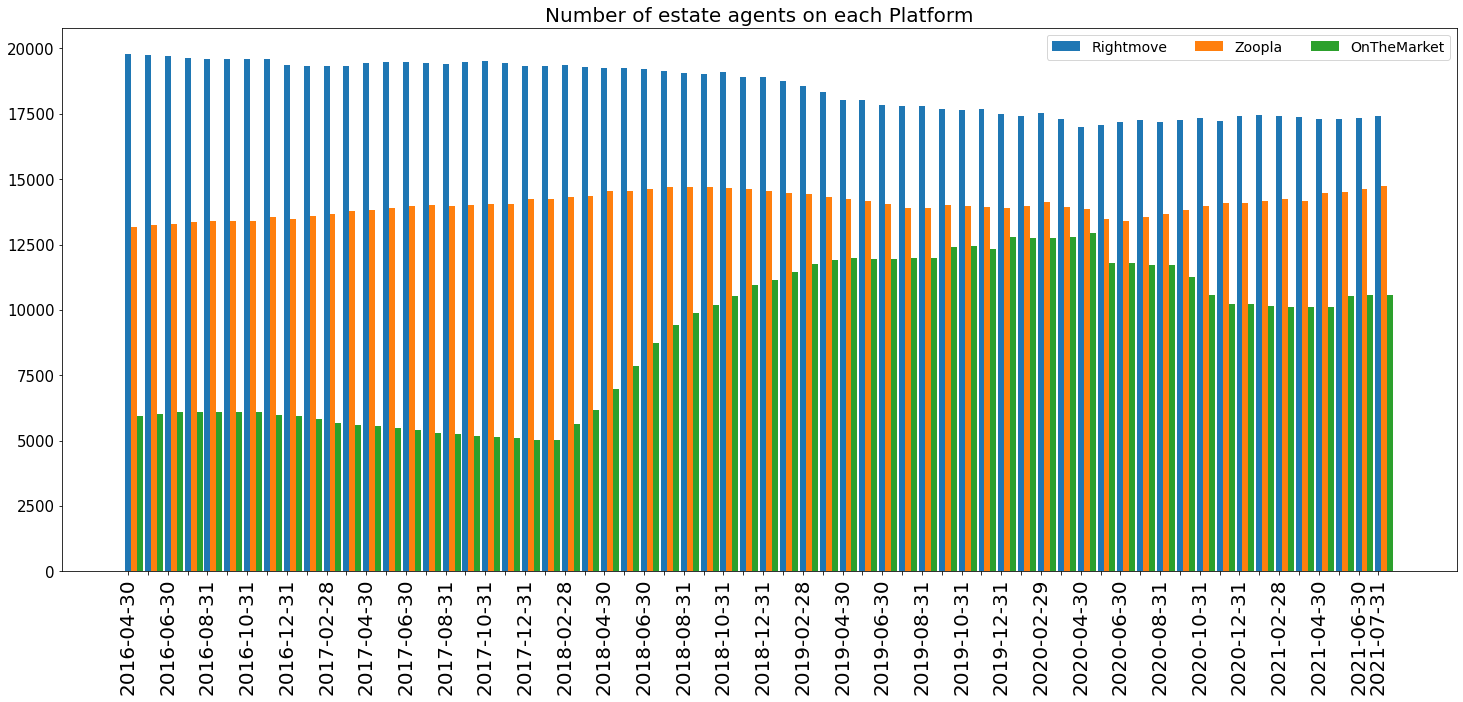

In [63]:
# plot bar chart showing branches in all 3 platforms

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.8, wspace=0.2)
#plt.suptitle('Charts showing number of restaurants on the Deliveroo site, net changes and gross changes', fontsize = 20)

x = df_rightmoveSmry.index.values

labels = list(df_rightmoveSmry['Adj Date'].astype(str).str[0:10])
for i in range(2,len(labels),2):
    labels[i-1]=''
labels[-1] = list(df_rightmoveSmry['Adj Date'].astype(str).str[0:10])[-1]

y1 = df_rightmoveSmry['branches']
y2 = df_zooplaSmry['branches']
y3 = df_onthemarketSmry['branches']
ax.set_title('Number of estate agents on each Platform', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 90, fontsize=20)
ax.yaxis.set_tick_params(labelsize=15)
ax.bar(x, y1, width=0.3, label='Rightmove')
ax.bar(x+0.3, y2, width=0.3, label='Zoopla')
ax.bar(x+0.6, y3, width=0.3, label = 'OnTheMarket')
ax.legend(ncol = 3, bbox_to_anchor=(1, 1), loc=1, fontsize=14)


if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('onlineresidentialportals - branches.png', bbox_inches = 'tight')
    
    slideTitle.append('Number of Estate Agents on each Platform')
    slideText.append('April 2016 to '+ str(monthNow))
    imagePath.append('onlineresidentialportals - branches.png')

plt.show()

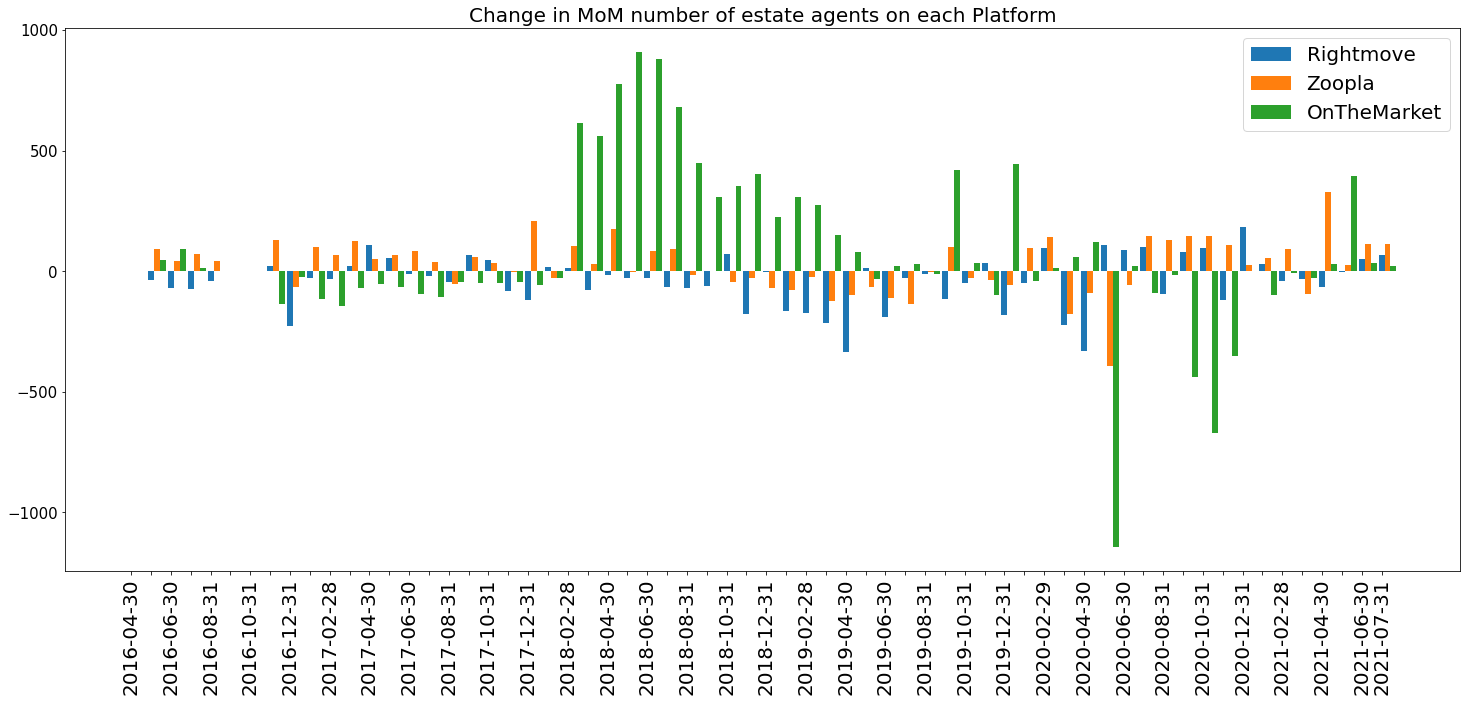

In [64]:
# plot bar chart showing net change in branches in all 3 platforms

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10))

plt.subplots_adjust(hspace=0.8, wspace=0.2)
#plt.suptitle('Charts showing number of restaurants on the Deliveroo site, net changes and gross changes', fontsize = 20)

x = df_rightmoveSmry.index.values

labels = list(df_rightmoveSmry['Adj Date'].astype(str).str[0:10])
for i in range(2,len(labels),2):
    labels[i-1]=''
labels[-1] = list(df_rightmoveSmry['Adj Date'].astype(str).str[0:10])[-1]

y1 = df_rightmoveSmry['change']
y2 = df_zooplaSmry['change']
y3 = df_onthemarketSmry['change']
ax.set_title('Change in MoM number of estate agents on each Platform', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 90, fontsize=20)
ax.yaxis.set_tick_params(labelsize=15)
ax.bar(x, y1, width=0.3, label='Rightmove')
ax.bar(x+0.3, y2, width=0.3, label='Zoopla')
ax.bar(x+0.6, y3, width=0.3, label = 'OnTheMarket')
ax.legend(fontsize = 20)


if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('onlineresidentialportals - change in branches.png', bbox_inches = 'tight')
    
    slideTitle.append('Month-on-Month change in branches on each Platform')
    slideText.append('April 2016 to '+ str(monthNow))
    imagePath.append('onlineresidentialportals - change in branches.png')

plt.show()

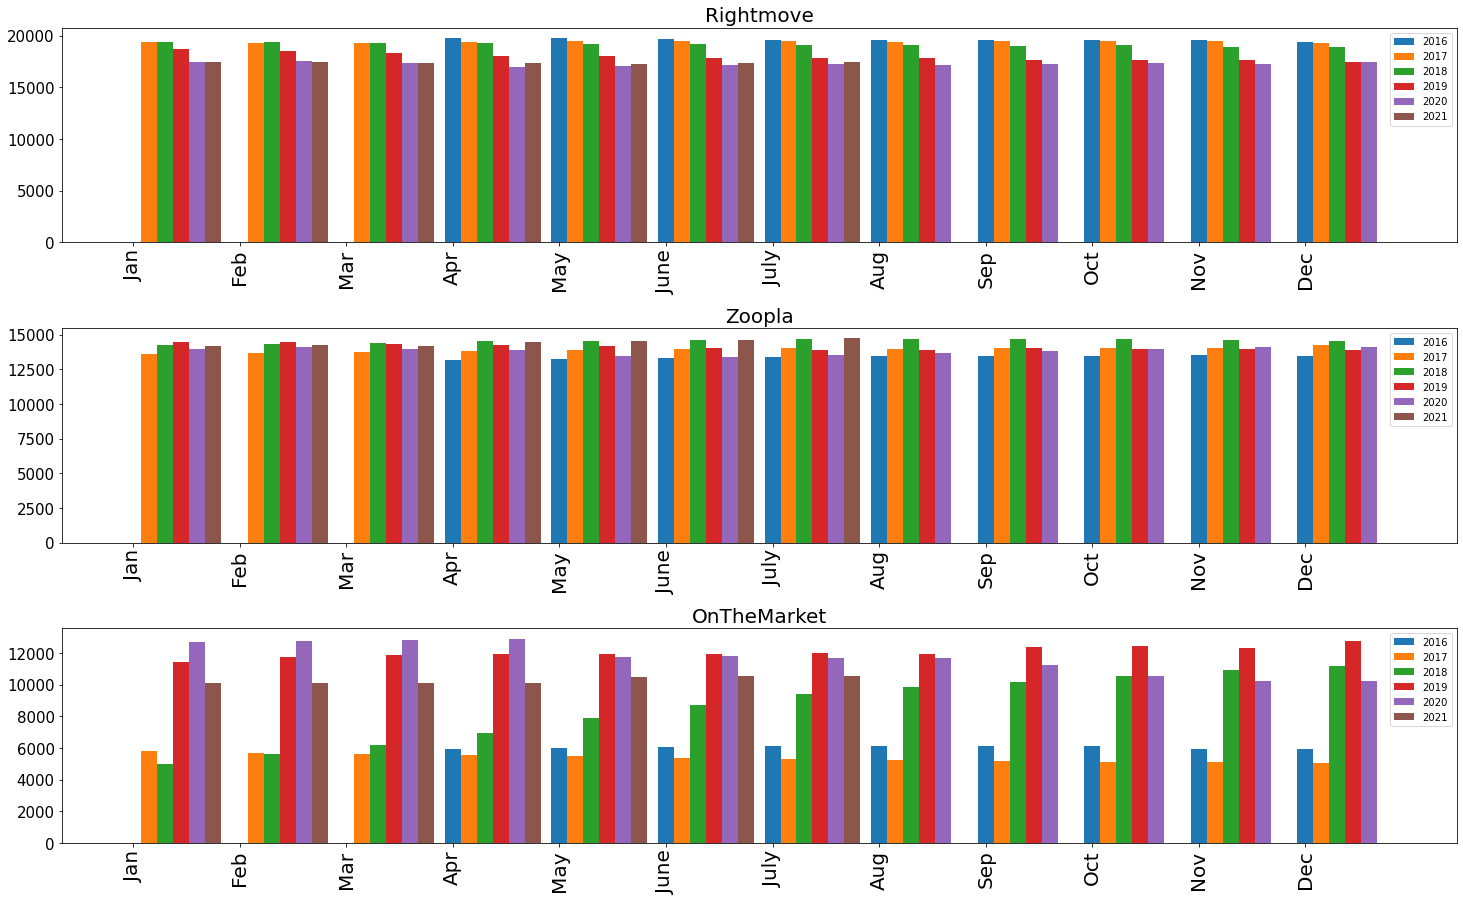

In [65]:
# plot bar charts showing yoy change in branches in all 3 platforms

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(25,15))

plt.subplots_adjust(hspace=0.4, wspace=0.2)
#plt.suptitle('Charts showing number of restaurants on the Deliveroo site, net changes and gross changes', fontsize = 20)

x = df_rightmoveSmry.index.values[0:12]

labels = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']

#labels = list(df_rightmoveSmry['Adj Date'].astype(str).str[0:10])

y1=[0,0,0]
for i in range(9):
    y1.append(df_rightmoveSmry['branches'][i])

y6=[]
for i in range(57,len(df_rightmoveSmry)):
    y6.append(df_rightmoveSmry['branches'][i])

for i in range(12-(len(df_rightmoveSmry)-57)):
    y6.append(0)
    
y2 = df_rightmoveSmry['branches'][9:21]
y3 = df_rightmoveSmry['branches'][21:33]
y4 = df_rightmoveSmry['branches'][33:45]
y5 = df_rightmoveSmry['branches'][45:57]

width = 0.15

ax[0].set_title('Rightmove', fontsize=20)
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels, rotation = 90, fontsize=20)
ax[0].yaxis.set_tick_params(labelsize=15)
ax[0].bar(x, y1, width=width, label='2016')
ax[0].bar(x+width, y2, width=width, label='2017')
ax[0].bar(x+width*2, y3, width=width, label = '2018')
ax[0].bar(x+width*3, y4, width=width, label = '2019')
ax[0].bar(x+width*4, y5, width=width, label = '2020')
ax[0].bar(x+width*5, y6, width=width, label = '2021')


ax[0].legend()

y1=[0,0,0]
for i in range(9):
    y1.append(df_zooplaSmry['branches'][i])

y6=[]
for i in range(57,len(df_zooplaSmry)):
    y6.append(df_zooplaSmry['branches'][i])

for i in range(12-(len(df_zooplaSmry)-57)):
    y6.append(0)
    
y2 = df_zooplaSmry['branches'][9:21]
y3 = df_zooplaSmry['branches'][21:33]
y4 = df_zooplaSmry['branches'][33:45]
y5 = df_zooplaSmry['branches'][45:57]
ax[1].set_title('Zoopla', fontsize=20)
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels, rotation = 90, fontsize=20)
ax[1].yaxis.set_tick_params(labelsize=15)
ax[1].bar(x, y1, width=width, label='2016')
ax[1].bar(x+width, y2, width=width, label='2017')
ax[1].bar(x+width*2, y3, width=width, label = '2018')
ax[1].bar(x+width*3, y4, width=width, label = '2019')
ax[1].bar(x+width*4, y5, width=width, label = '2020')
ax[1].bar(x+width*5, y6, width=width, label = '2021')
ax[1].legend()

y1=[0,0,0]
for i in range(9):
    y1.append(df_onthemarketSmry['branches'][i])

y6=[]
for i in range(57,len(df_onthemarketSmry)):
    y6.append(df_onthemarketSmry['branches'][i])

for i in range(12-(len(df_onthemarketSmry)-57)):
    y6.append(0)
    
y2 = df_onthemarketSmry['branches'][9:21]
y3 = df_onthemarketSmry['branches'][21:33]
y4 = df_onthemarketSmry['branches'][33:45]
y5 = df_onthemarketSmry['branches'][45:57]

ax[2].set_title('OnTheMarket', fontsize=20)
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels, rotation = 90, fontsize=20)
ax[2].yaxis.set_tick_params(labelsize=15)
ax[2].bar(x, y1, width=width, label='2016')
ax[2].bar(x+width, y2, width=width, label='2017')
ax[2].bar(x+width*2, y3, width=width, label = '2018')
ax[2].bar(x+width*3, y4, width=width, label = '2019')
ax[2].bar(x+width*4, y5, width=width, label = '2020')
ax[2].bar(x+width*5, y6, width=width, label = '2021')
ax[2].legend()

if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('onlineresidentialportals - yoy change in branches.png', bbox_inches = 'tight')
    
    slideTitle.append('Year-on-Year change in branches on each Platform')
    slideText.append('April 2016 to '+ str(monthNow))
    imagePath.append('onlineresidentialportals - yoy change in branches.png')

plt.show()

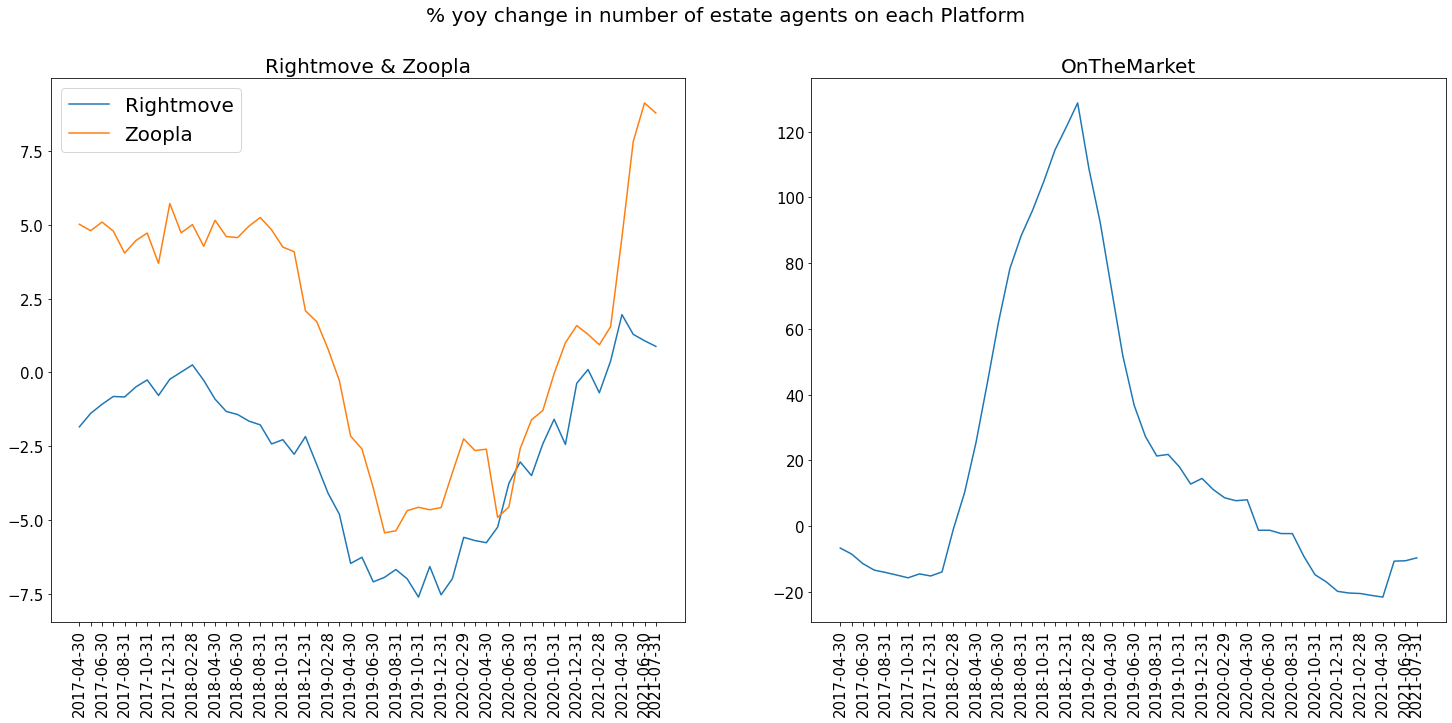

In [66]:
# plot line chart showing % yoy change in branches in all 3 platforms

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,10))

plt.subplots_adjust(hspace=0.8, wspace=0.2)
plt.suptitle('% yoy change in number of estate agents on each Platform', fontsize = 20)

x = df_rightmoveSmry.index.values[12:len(df_rightmoveSmry)]

labels = list(df_rightmoveSmry['Adj Date'].astype(str).str[0:10])[12:len(df_rightmoveSmry)]
for i in range(2,len(labels),2):
    labels[i-1]=''
labels[-1] = list(df_rightmoveSmry['Adj Date'].astype(str).str[0:10])[12:len(df_rightmoveSmry)][-1]

y1 = df_rightmoveSmry['pctChange'][12:len(df_rightmoveSmry)]
y2 = df_zooplaSmry['pctChange'][12:len(df_rightmoveSmry)]
y3 = df_onthemarketSmry['pctChange'][12:len(df_rightmoveSmry)]
ax[0].set_title('Rightmove & Zoopla', fontsize=20)
ax[1].set_title('OnTheMarket', fontsize=20)
ax[0].set_xticks(x)
ax[1].set_xticks(x)
ax[0].set_xticklabels(labels, rotation = 90, fontsize=15)
ax[1].set_xticklabels(labels, rotation = 90, fontsize=15)
ax[0].yaxis.set_tick_params(labelsize=15)
ax[1].yaxis.set_tick_params(labelsize=15)
ax[0].plot(x, y1, label='Rightmove')
ax[0].plot(x, y2, label='Zoopla')
ax[1].plot(x, y3, label = 'OnTheMarket')
ax[0].legend(fontsize=20)


if savePNG == 1 or PwrptPrep == 1:
    plt.savefig('onlineresidentialportals - pct yoy change in branches.png', bbox_inches = 'tight')
    
    slideTitle.append('Percentage Year-on-Year change in branches')
    slideText.append('April 2016 to '+ str(monthNow))
    imagePath.append('onlineresidentialportals - pct yoy change in branches.png')

plt.show()

In [67]:
#
# Preparing the presentation
#

In [68]:
if PwrptPrep == 1:
    prs = Presentation('Persentation - template.pptx')

In [69]:
# change the title and date on the front page
# the slide shapes do not go nicely 0,1,2 they go 1,2,0
if PwrptPrep == 1:
    
    listShapes = [1,2,0]

    for i in range(3):
        slide = prs.slides[0]
        shape = slide.shapes[listShapes[i]]
        text_frame = shape.text_frame
        text_frame.paragraphs[0].runs[0].text = presentationTitle[i]

In [70]:
# add the Preamble and Summary slides
if PwrptPrep == 1:

    title_Preamble_Summary = ['Preamble', 'Summary']

    for i in range(2):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = title_Preamble_Summary[i]

        top = height = Inches(1.5)
        width = Inches(10.25)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame
        tf.word_wrap = True
        p = tf.add_paragraph()
        p.level = 1
        
        if i == 0:
            p.text = 'This presentation purely looks at the number of branches on the Rightmove vs Zoopla vs OnTheMarket platforms'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'It does not attempt to differentiate between small and large branches'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'Nor does it attempt to look at the number of properties on the site'
            p = tf.add_paragraph()
            p.level = 1            
            p.text = 'original data points collected from the Rightmove website is currently ' + '{0:.2f}'.format(dataPoints_rightmove/1000000) + ' million'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'original data points collected from the Zoopla website is currently ' + '{0:.2f}'.format(dataPoints_zoopla/1000000) + ' million'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'original data points collected from the OnTheMarket website is currently ' + '{0:.2f}'.format(dataPoints_onthemarket/1000000) + ' million'
            p = tf.add_paragraph()
            p.level = 1
            p.text = 'the data is gathered weekly from April 2016 to ' + str(monthNow)
            p = tf.add_paragraph()
            p.level = 1
            
        if i == 1:
            p.text = 'to be added by user if required'
            p = tf.add_paragraph()
            p.level = 1

In [71]:
# add the Chapter contents slide and Chapter 1 slide
if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'Contents'

    rows = cols = 2
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(1.5)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(1.5)
    table.columns[1].width = Inches(2.0)

    tableText = ['01', 'Charts', '02', 'Appendix']
    TableFont = [60, 14, 60, 14]
    tableCell1 = [0,0,1,1]
    tableCell2 = [0,1,0,1]

    for i in range(4):
        table.cell(tableCell1[i], tableCell2[i]).text = tableText[i]
        cell = table.cell(tableCell1[i], tableCell2[i])
        para = cell.text_frame.paragraphs[0]
        para.font.bold = True
        para.font.size = Pt(TableFont[i])
        para.font.color.rgb = RGBColor(0, 55, 129) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()

    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '01'
    title = slide.shapes.title
    title.text = 'Charts'


In [72]:
# add a blank slide with title, text and saved graphic as per the list of items
if PwrptPrep == 1:
    
    for i in range(len(slideTitle)):

        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)

        title = slide.shapes.title
        title.text = slideTitle[i]

        top = width = height = Inches(1.5)
        left = Inches(0.25)
        txBox = slide.shapes.add_textbox(left, top, width, height)
        tf = txBox.text_frame

        p = tf.add_paragraph()
        p.text = slideText[i]
        p.font.bold = True
        p.font.size = Pt(14)

        left = Inches(0.25)
        top = Inches(2.5)
        height = Inches(4)
        width = Inches(9)
        pic = slide.shapes.add_picture(imagePath[i], left, top, width = width, height = height)

In [73]:
# add the Appendix slide and the 'First 5 lines of the latest Rightmove upload slide'

if PwrptPrep == 1:
    
    slide = prs.slides.add_slide(prs.slide_layouts[9])
    placeholder = slide.placeholders[1]
    placeholder.text = '02'
    title = slide.shapes.title
    title.text = 'Appendix'
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'First 5 lines of the latest Rightmove upload ('+str(monthNow)+')'

    rows, cols = 6,4
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(0.25)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(0.5)
    table.columns[1].width = Inches(2.0)
    table.columns[2].width = Inches(2.0)
    table.columns[3].width = Inches(1.5)
    
    tableText = ['']
    
    for col in df_rightmove[-1].columns[0:cols-1]:
        tableText.append(col)
        
    for i in range(rows * (cols-1)):
        if i%(cols-1) == 0:
            tableText.append(str(int(i/(cols-1))))          
        tableText.append(str(df_rightmove[-1].iat[int(i/(cols-1)), i%(cols-1)]))

    for i in range(rows * cols):
        table.cell(int(i/cols), i%cols).text = tableText[i]
        cell = table.cell(int(i/cols), i%cols)
        para = cell.text_frame.paragraphs[0]
        if i%cols == 0 or int(i/cols) == 0:
            para.font.bold = True
        else:
            para.font.bold = False
        para.font.size = Pt(10)
        para.font.color.rgb = RGBColor(0, 0, 0) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()
    

In [74]:
# add  the 'First 5 lines of the latest Zoopla upload slide'

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'First 5 lines of the latest Zoopla upload ('+str(monthNow)+')'

    rows, cols = 6,5
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(0.25)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(0.5)
    table.columns[1].width = Inches(1.0)
    table.columns[2].width = Inches(1.0)
    table.columns[3].width = Inches(2.0)
    table.columns[4].width = Inches(2.5)
    
    
    tableText = ['']
    
    for col in df_zoopla[-1].columns[0:cols-1]:
        tableText.append(col)
        
    for i in range(rows * (cols-1)):
        if i%(cols-1) == 0:
            tableText.append(str(int(i/(cols-1))))          
        tableText.append(str(df_zoopla[-1].iat[int(i/(cols-1)), i%(cols-1)]))

    for i in range(rows * cols):
        table.cell(int(i/cols), i%cols).text = tableText[i]
        cell = table.cell(int(i/cols), i%cols)
        para = cell.text_frame.paragraphs[0]
        if i%cols == 0 or int(i/cols) == 0:
            para.font.bold = True
        else:
            para.font.bold = False
        para.font.size = Pt(10)
        para.font.color.rgb = RGBColor(0, 0, 0) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()
    

In [75]:
# add  the 'First 5 lines of the latest OnTheMarket upload slide'

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[15]
    slide = prs.slides.add_slide(blank_slide_layout)

    shapes = slide.shapes

    shapes.title.text = 'First 5 lines of the latest OnTheMarket upload ('+str(monthNow)+')'

    rows, cols = 6,3
    left = Inches(0.25)
    top = Inches(1.5)
    width = Inches(1.5)
    height = Inches(0.25)

    table = shapes.add_table(rows, cols, left, top, width, height).table

    # set column widths
    table.columns[0].width = Inches(0.5)
    table.columns[1].width = Inches(2.5)
    table.columns[2].width = Inches(3.0)
    
    tableText = ['']
    
    for col in df_onthemarket[-1].columns[0:cols-1]:
        tableText.append(col)
        
    for i in range(rows * (cols-1)):
        if i%(cols-1) == 0:
            tableText.append(str(int(i/(cols-1))))          
        tableText.append(str(df_onthemarket[-1].iat[int(i/(cols-1)), i%(cols-1)]))

    for i in range(rows * cols):
        table.cell(int(i/cols), i%cols).text = tableText[i]
        cell = table.cell(int(i/cols), i%cols)
        para = cell.text_frame.paragraphs[0]
        if i%cols == 0 or int(i/cols) == 0:
            para.font.bold = True
        else:
            para.font.bold = False
        para.font.size = Pt(10)
        para.font.color.rgb = RGBColor(0, 0, 0) 
        cell.vertical_anchor = MSO_ANCHOR.MIDDLE
        fill = cell.fill
        fill.background()
    

In [76]:
# add the Appendix slide and the 'First 5 lines of the latest upload slide'
# and the 'Code used to gather page'
# and upload the Python, github and Pandas pages

if PwrptPrep == 1:
    
    # list of appendix text files to take from my PC to be put into slides
    appendixTitleList = ['Limitations of this analysis','Code used to gather the Rightmove data part 1 ',
                         'Code used to gather the Rightmove data part 2 ','Appendix: Python Programming Language',
                         'Appendix: Github','Appendix: Pandas']
    appendixFileList = ['Presentation - Rightmove1 limitations.txt',
                        'Presentation - code Rightmove1 1.txt','Presentation - code Rightmove1 2.txt', 
                        'Presentation - Python Slide.txt', 'Presentation - Github Slide.txt','Presentation - Pandas Slide.txt']

    for i in range(5):
        blank_slide_layout = prs.slide_layouts[15]
        slide = prs.slides.add_slide(blank_slide_layout)
        title = slide.shapes.title
        title.text = appendixTitleList[i]
        lines = [line.rstrip('\n') for line in open(appendixFileList[i])]
        
        if appendixTitleList[i] == 'Code used to gather the Rightmove data ': # rotate the text code -90
            top = height = Inches(1.25)
            width = Inches(10.25)
            left = Inches(-4.25)
            txBox = slide.shapes.add_textbox(left, top, width, height)
            txBox.rotation = -90            
        else: # other slides are normal
            top = height = Inches(1.25)
            width = Inches(10.25)
            left = Inches(0.25)
            txBox = slide.shapes.add_textbox(left, top, width, height)
            txBox.rotation = 0
            
        tf = txBox.text_frame
        tf.word_wrap = True
        
        for ii in range(len(lines)):
            p = tf.add_paragraph()
            p.level = 1
            
            if appendixTitleList[i] == 'Appendix: Methodology' and ii>1: # reduce the font size after line 1
                p.font.size = Pt(7)     
            elif (appendixTitleList[i] == 'Code used to gather the Rightmove data part 1 ') or \
            (appendixTitleList[i] == 'Code used to gather the Rightmove data part 2 '):
                p.font.size = Pt(8)
                p.level = 0  
            else:
                txBox.rotation = 0
                p.font.size = Pt(12)            
            
            if 'https' in lines[ii]:
                r = p.add_run()
                r.text = lines[ii].split('https')[0]
                r1 = p.add_run()
                r1.text = 'https' + lines[ii].split('https')[1]        
                hlink = r1.hyperlink
                hlink.address = r1.text
            else:
                p.text = lines[ii]


In [77]:
# add closing slide

if PwrptPrep == 1:
    
    blank_slide_layout = prs.slide_layouts[40]
    slide = prs.slides.add_slide(blank_slide_layout)

In [78]:
# save completed presentation to file using name diven in the slide name cell
if PwrptPrep == 1:

    prs.save(saveFileName)

In [79]:
#
# all the slide types
# only to be run for reference
#

In [80]:
# prs = Presentation('Persentation - template.pptx')

In [81]:
# for i in range(43):

#     blank_slide_layout = prs.slide_layouts[i]
#     slide = prs.slides.add_slide(blank_slide_layout)

In [82]:
# prs.save('presentationPrep - all the slides.pptx')